In [7]:
# 📦 Import des bibliothèques
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
print("Shape:", df_encoded.shape)
df_encoded.head()

Shape: (7032, 41)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,True,False,False,True,False,False,False,False,True,False


In [9]:
import pandas as pd
df_encoded = pd.read_csv("../data/processed/prepared_dataset.csv")
print(df_encoded["Churn"].value_counts())

# Séparation features (X) et target (y)
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

y.value_counts(normalize=True)


Churn
0    5163
1    1869
Name: count, dtype: int64


Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

In [10]:
# 🔀 Split en 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [11]:
# 📈 Régression Logistique
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("🔹 Régression Logistique")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))



🔹 Régression Logistique
[[917 116]
 [160 214]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [12]:
# 🌳 Arbre de Décision
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("🔹 Arbre de Décision")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


🔹 Arbre de Décision
[[835 198]
 [182 192]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1033
           1       0.49      0.51      0.50       374

    accuracy                           0.73      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.73      0.73      0.73      1407



In [13]:
# 🌲 Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("🔹 Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest
[[918 115]
 [186 188]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



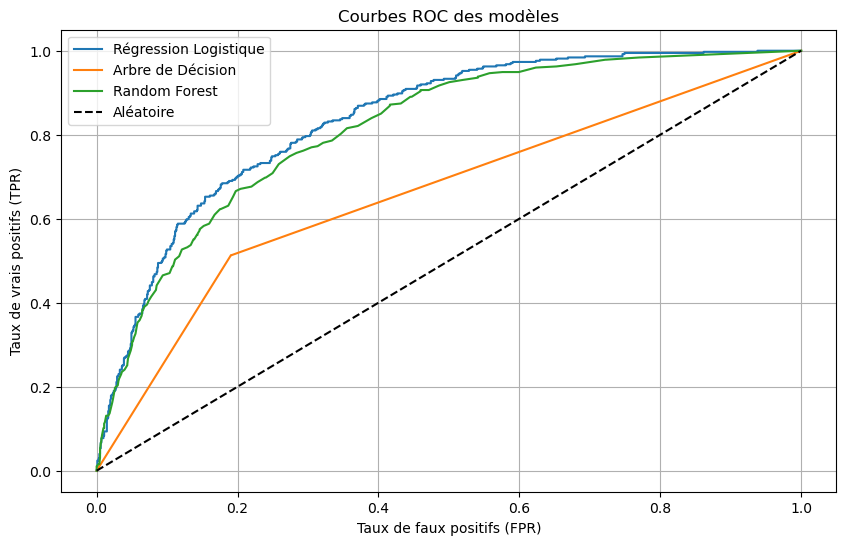

In [14]:
# 📈 Courbes ROC pour les 3 modèles

# Probabilités de classe positive
y_proba_log = log_model.predict_proba(X_test)[:, 1]
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Calcul des points ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# Tracé
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label='Régression Logistique')
plt.plot(fpr_tree, tpr_tree, label='Arbre de Décision')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbes ROC des modèles')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

results = {
    "Modèle": ["Régression Logistique", "Arbre de Décision", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_rf)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_tree),
        f1_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_tree),
        recall_score(y_test, y_pred_rf)
    ],
    "AUC": [
        roc_auc_score(y_test, y_proba_log),
        roc_auc_score(y_test, y_proba_tree),
        roc_auc_score(y_test, y_proba_rf)
    ]
}

pd.DataFrame(results)


,Modèle,Accuracy,F1 Score,Recall,AUC
0,Régression Logistique,0.803838,0.607955,0.572193,0.835882
1,Arbre de Décision,0.729922,0.502618,0.513369,0.661096
2,Random Forest,0.786070,0.555391,0.502674,0.814110


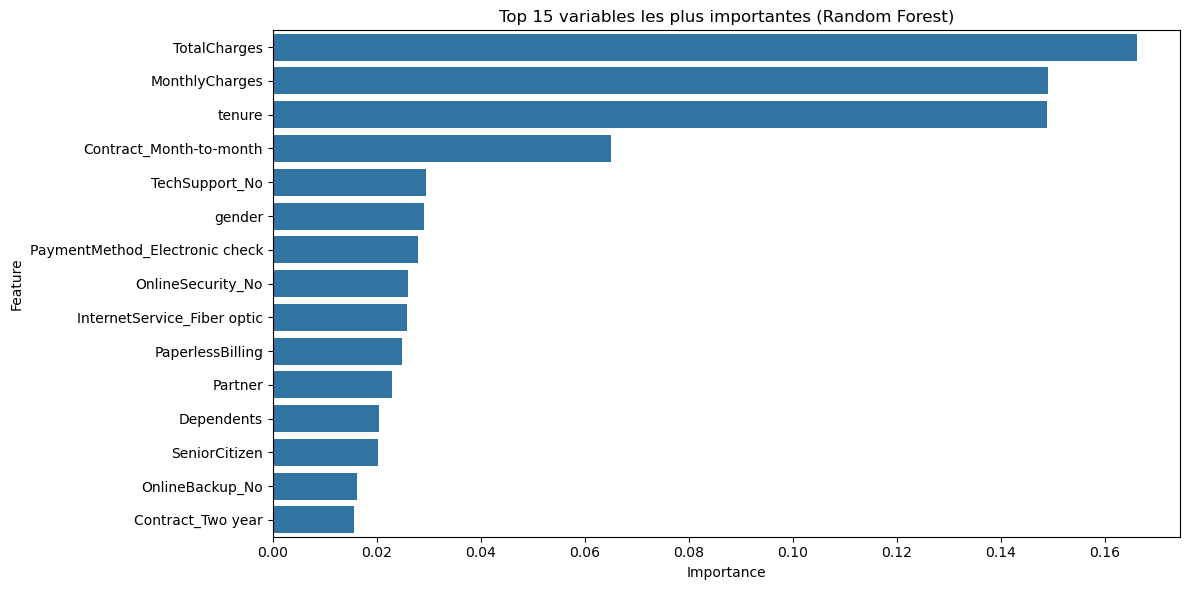

In [16]:
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title("Top 15 variables les plus importantes (Random Forest)")
plt.tight_layout()
plt.show()


In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1')
print(f"F1 Score moyen sur 5 folds : {scores.mean():.4f}")


F1 Score moyen sur 5 folds : 0.5459
